In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# 결측치 파악
titanic_df['Age'].isnull().sum()

177

In [4]:
titanic_df['Cabin'].isnull().sum()

687

In [5]:
# Null 처리

titanic_df['Age'].fillna(titanic_df['Age'].mean, inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print(titanic_df.isnull().sum().sum())

0


In [6]:
print('Sex 분포: \n', titanic_df['Sex'].value_counts())
print('Cabin 분포: \n', titanic_df['Cabin'].value_counts())
print('Embarked 분포: \n', titanic_df['Embarked'].value_counts())

Sex 분포: 
 male      577
female    314
Name: Sex, dtype: int64
Cabin 분포: 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
              ... 
B37              1
D48              1
D37              1
C49              1
B39              1
Name: Cabin, Length: 148, dtype: int64
Embarked 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [7]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [8]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

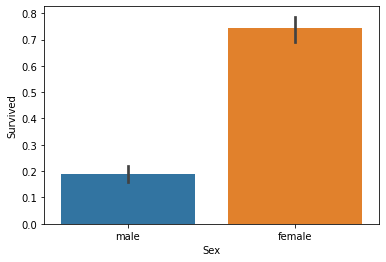

In [9]:
sns.barplot(x='Sex',y='Survived', data=titanic_df)

In [10]:
# 데이터 전처리 : 인코딩


from sklearn import preprocessing 

#레이블 인코딩 함수

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [11]:
# 데이터 전처리 : 삭제

titanic_df.drop(['PassengerId' ,'Name' , 'Ticket'],axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [22]:

from sklearn.preprocessing  import LabelEncoder
# Null 처리 함수

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1] #첫문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

# 앞에 설정한 데이터 프로세싱 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df



In [23]:
# 1단계 데이터 로딩

titanic_df = pd.read_csv('train.csv')

y_titanic_df = titanic_df['Survived']

X_titanic_df = titanic_df.drop('Survived', axis=1)

In [24]:
X_titanic_df = transform_features(X_titanic_df)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=11)

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 estimator 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rt_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 결정트리, 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리의 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤포레스트, 학습/예측/평가
rt_clf.fit(X_train, y_train)
rt_pred = rt_clf.predict(X_test)
print('랜덤포레스트의 정확도 : {0:.4f}'.format(accuracy_score(y_test, rt_pred)))

# 로지스틱회귀, 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱회귀의 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


결정트리의 정확도 : 0.9644
랜덤포레스트의 정확도 : 0.9956
로지스틱회귀의 정확도 : 0.9867


/Users/kimboa/opt/anaconda3/envs/multi/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
from sklearn.model_selection import KFold


def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    score = []
    
    for iter_n, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))
    
exec_kfold(dt_clf, folds=5)

NameError: name 'scores' is not defined

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차검층 {0} 정확도 : {0:.4f}".format(iter_count, accuracy))
    
print("평균정확도 : {0:.4f}".format(np.mean(scores)))

교차검층 0 정확도 : 0.0000
교차검층 1 정확도 : 1.0000
교차검층 2 정확도 : 2.0000
교차검층 3 정확도 : 3.0000
교차검층 4 정확도 : 4.0000
평균정확도 : 0.7879


In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DscisionTreeClassifier 정확도 : {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DscisionTreeClassifier 정확도 : 0.8715


In [52]:
# 생존자 예측

import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        predit = np.zeros((X.shape[0], 1))
        for i in range(X,shape[0]):
            if X['Sex'].iloc[i] == 1:
                red[i] = 0
            else :
                pred[i] = 1
        return pred

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


titanic_df = pd.read_csv('train.csv')

y_titanic_df = titanic_df['Survived']

X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train,y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypred = myclf.predict(X_test)
print(" 정확도 : {0:.4f}".format(accuracy_score(y_test, mypred)))

NameError: name 'shape' is not defined

In [95]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator) :
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    

In [57]:
digits = load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [61]:
# 7인 데이터 확인

digits.target ==7


array([False, False, False, ..., False, False, False])

In [62]:
# 7인 데이터는 1, 그외 데이터는 0으로 변환

y = (digits.target == 7).astype(int)

In [63]:
# 학습/테스트 데이터 세트로 분리

X_train, X_test, y_train, t_test = train_test_split(digits.data, y, random_state = 11)

In [64]:
X_train

array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [65]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [66]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
# 불균형한 레이블 데이터 분포도 확인
pd.Series(y_test).value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [96]:

fake_clf = MyFakeClassifier()
fake_clf.fit(X_train, y_train)
fakepred = fake_clf.predict(X_test)

print ( '정확도 : {:.3f}'.format(accuracy_score(y_test, fakepred)))


정확도 : 0.900


In [98]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

In [102]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator) :
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

    
digits = load_digits()
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state =11)

fake_clf = MyFakeClassifier()
fake_clf.fit(X_train, y_train)
fakepred = fake_clf.predict(X_test)
print("정확도 : {:.3f}". format(accuracy_score(y_test, fakepred)))

정확도 : 0.900


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {0:.4f}, 재현율 : {2:.4f}'. format(accuracy,precision,recall))

In [109]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:10]

array([[9.99999978e-01, 2.21253351e-08],
       [9.78579614e-01, 2.14203862e-02],
       [9.99999789e-01, 2.11199618e-07],
       [9.99999999e-01, 1.21326943e-09],
       [9.99963335e-01, 3.66654457e-05],
       [9.99999975e-01, 2.53543179e-08],
       [9.99999999e-01, 1.13188106e-09],
       [1.00000000e+00, 8.71448450e-11],
       [1.00000000e+00, 3.11957422e-12],
       [9.99999864e-01, 1.35827331e-07]])

In [122]:
from sklearn.preprocessing import Binarizer

c_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = c_threshold).fit(pred_proba_1)
c_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, c_predict)

오차행렬
[[400   5]
 [  2  43]]
정확도 : 0.9844, 정밀도 : 0.9844, 재현율 : 0.9556


In [123]:
from sklearn.metrics import precision_recall_curve
import numpy as np

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape: ',thresholds.shape)

print("임계값 shape : ", thresholds.shape)
print("정밀도 shape : ", precisions.shape)
print("재현율 shape : ", recalls.shape)

thr_index = np.arrange(0, thresholds.shape[0], 15)
print("sample index : ", idx)
print("임계값 sample : ", thresholds[idx])
print("정밀도 sample : ", precisions[idx])
print("재현율 sample : ", recalls[idx])

반환된 분류 결정 임곗값 배열의 Shape:  (80,)
임계값 shape :  (80,)
정밀도 shape :  (81,)
재현율 shape :  (81,)


AttributeError: module 'numpy' has no attribute 'arrange'

In [ ]:
# 정밀도와 재현율의 조화 평균

# 정밀도 0.9 / 재현율 0.1 => 극단적 차이
  

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_eval_by_threshold(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    f1 = f1_score(y_test.pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {0:.4f}, 재현율 : {2:.4f},  F1;{3:.4f}'. format(accuracy,precision,recall,f1))

In [127]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

TypeError: get_eval_by_threshold() takes 2 positional arguments but 3 were given

In [ ]:
# ROC Curve와 AUC

# ROC(Reciver Operating Characteristic)

